In [1]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation

from sklearn.metrics import r2_score
from matplotlib import pyplot
import numpy as np
%matplotlib inline

Using TensorFlow backend.


In [9]:
n_sample = 500
n_sample2 = 500
n_feature = 2
n_dimy = 1
x = np.random.random(n_sample * n_feature).reshape(n_sample,n_feature)
x2 = np.random.random(n_sample2 * n_feature).reshape(n_sample2,n_feature)
y_true = np.zeros(n_sample*n_dimy).reshape(n_sample,n_dimy)
y_true2 = np.zeros(n_sample2*n_dimy).reshape(n_sample2,n_dimy)
a = np.array([3.1,0.3,0.7])


def my_f(x,a):
    ret = a[0] * (x[:,0] +x[:,1]) + a[1] * (x[:,0]**2+x[:,1]**2) + a[2] * (x[:,0]*x[:,1])
    return(ret)


y_true[:,0] = my_f(x,a)
y_true2[:,0] = my_f(x2,a)

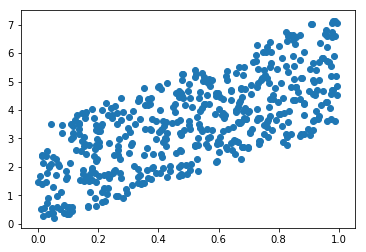

In [10]:
pyplot.scatter(x[:,0],y_true[:,0])
pyplot.show()

In [11]:
model = Sequential()
model.add(Dense(units=5, activation="tanh", kernel_initializer="uniform", input_dim=n_feature))
model.add(Dropout(0.2))
model.add(Dense(units=n_dimy, activation="linear", kernel_initializer="uniform"))

In [12]:
# Compile model
model.compile(loss='mse', optimizer='adam', metrics=['accuracy'])

In [13]:
X1 = x
Y1 = y_true
X2 = x2
Y2 = y_true2

# Fit the model
model.fit(X1, Y1, epochs=1000, batch_size=10,  verbose=0)

# Calculate predictions
PredTestSet = model.predict(X1)
PredTestSet2 = model.predict(X2)


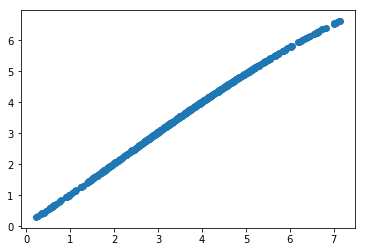

In [14]:
pyplot.scatter(Y1,PredTestSet)
pyplot.show()

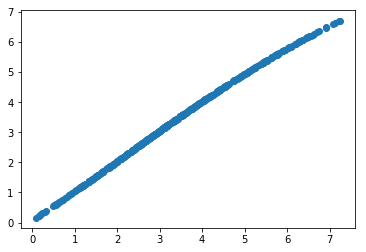

In [17]:
pyplot.scatter(Y2,PredTestSet2)
pyplot.show()

In [41]:
def my_r_polyval_polynom0 (nval,nterm):
    ret = np.zeros(nterm,nval)
def my_r_polyval_polynom (x,a,n=5):
    nval = x.shape[1]
    nsample = x.shape[0]
    y = np.zeros(nsample)
    for i in np.arange(n):
        tmp1 = np.random.choice(n)
        tmp2 = np.random.choice(np.arange(n),tmp1,replace=True)
        y += np.prod(x[:,tmp2],axis=0)
    return(y)

In [87]:


def my_polyvalpoly (x,polymat,w):
    n_sample = x.shape[0]
    y = np.zeros(n_sample)
    for i in np.arange(polymat.shape[0]):
        tmpy = np.ones(n_sample)
        for j in np.arange(polymat.shape[1]):
            tmpy *= tmpy * (x[:,j]**polymat[i,j])
        y += w[i] * tmpy
    return y

In [88]:
import itertools
for i in itertools.permutations(np.arange(3)):
    print(i)

(0, 1, 2)
(0, 2, 1)
(1, 0, 2)
(1, 2, 0)
(2, 0, 1)
(2, 1, 0)


In [108]:
n_var = 4
nterm = 6
lbd = 1.3
polymat = np.random.poisson(lbd,n_var*nterm).reshape(nterm,n_var)
print(polymat.shape)
w = np.random.normal(0,1,nterm)
n_sample = 500
n_sample2 = 500

n_dimy = 1
x = np.random.random(n_sample * n_var).reshape(n_sample,n_var)
x2 = np.random.random(n_sample2 * n_var).reshape(n_sample2,n_var)

y_true = np.zeros(n_sample)
y_true2 = np.zeros(n_sample)
for i in itertools.permutations(np.arange(n_var)):
    y_true += my_polyvalpoly (x[:,i],polymat,w)
    y_true2 += my_polyvalpoly (x2[:,i],polymat,w)

y_true = y_true.reshape(n_sample,1)
y_true2 = y_true2.reshape(n_sample,1)

(6, 4)


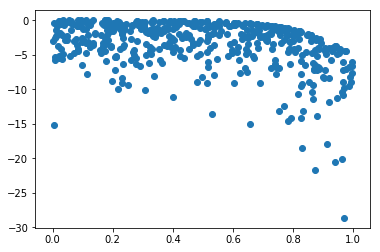

In [109]:
pyplot.scatter(x[:,0],y_true[:,0])
pyplot.show()


In [124]:
model = Sequential()
model.add(Dense(units=nterm*20, activation="tanh", kernel_initializer="uniform", input_dim=n_var))
model.add(Dense(units=nterm*30, activation="tanh", kernel_initializer="uniform"))
model.add(Dense(units=n_dimy, activation="linear", kernel_initializer="uniform"))

In [ ]:
# Compile model
model.compile(loss='mse', optimizer='adam', metrics=['accuracy'])
X1 = x
Y1 = y_true
X2 = x2
Y2 = y_true2

# Fit the model
model.fit(X1, Y1, epochs=1000, batch_size=10,  verbose=0)
#model.fit(X1, Y1, epochs=1000,  verbose=0)
# Calculate predictions
PredTestSet = model.predict(X1)
PredTestSet2 = model.predict(X2)

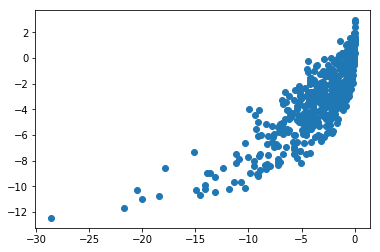

In [121]:
pyplot.scatter(Y1,PredTestSet)
pyplot.show()

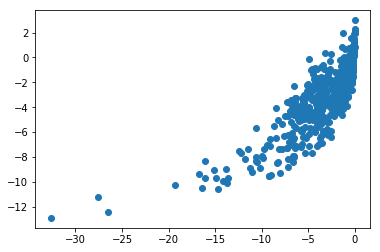

In [122]:
pyplot.scatter(Y2,PredTestSet2)
pyplot.show()

In [73]:
polymat

array([[0, 3],
       [3, 0],
       [3, 4]])

In [47]:
np.random.poisson(1,3*4)

array([1, 0, 0, 3, 1, 2, 1, 1, 0, 1, 0, 3])

In [28]:
np.sort(np.random.choice(np.arange(21),10,replace=False))

array([ 1,  2,  6,  7,  9, 10, 12, 14, 17, 18])

In [31]:
x.shape[1]

2

In [38]:
np.prod([[1.,2.,3.],[3.,4.,2.]], axis=0)

array([3., 8., 6.])

In [39]:
np.array([[1,2,3],[3,4,5]])

array([[1, 2, 3],
       [3, 4, 5]])

In [40]:
x

array([[3.91869367e-01, 1.59116898e-01],
       [5.66129674e-01, 3.22527431e-01],
       [8.26550285e-01, 2.70474227e-03],
       [5.59062043e-01, 2.78224108e-01],
       [5.32828372e-01, 3.52971071e-01],
       [3.65724933e-01, 8.86937169e-01],
       [3.56015264e-01, 8.41166249e-01],
       [4.22809646e-01, 4.56685706e-01],
       [2.24357928e-01, 9.89832412e-01],
       [5.05582363e-01, 4.72821467e-01],
       [3.77651127e-01, 6.93571408e-01],
       [7.39947730e-01, 6.81044064e-01],
       [8.47065201e-01, 4.00431978e-01],
       [7.50303075e-02, 2.71200674e-01],
       [1.53963196e-01, 3.16489265e-01],
       [3.75650609e-01, 8.88967683e-01],
       [1.80132768e-01, 4.15112965e-01],
       [4.74669327e-01, 4.44868158e-01],
       [8.00130155e-01, 9.09291040e-01],
       [5.46548901e-01, 9.34871845e-01],
       [2.30023183e-01, 9.65372309e-02],
       [1.26820762e-01, 6.45186662e-01],
       [5.63769259e-01, 8.28343665e-01],
       [1.90690309e-01, 1.06572352e-02],
       [5.672161